# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

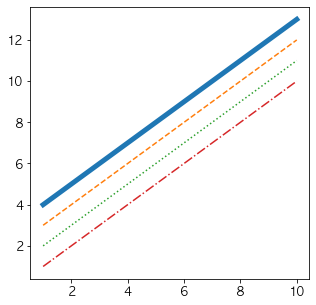

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

x = np.linspace(1, 10, num = 100)
plt.figure(figsize =(5,5))

# x, y 
plt.plot(x, x + 3, linestyle = '-', linewidth = 5) # 선 굵기 지정가능 
plt.plot(x, x + 2, linestyle = '--')
plt.plot(x, x + 1, linestyle = ':')
plt.plot(x, x, linestyle = '-.')
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [4]:
# 최대농도(㎍/㎥/시) 이름을 변경하자. 조회시 불편하니 
df.rename({df.columns[-1]: '최대농도'}, axis = 1, inplace = True)
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


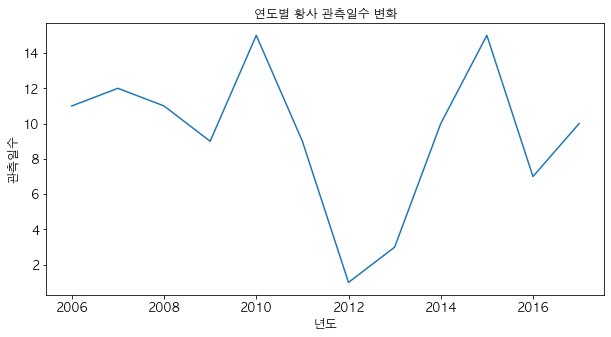

In [5]:
# 년도에 따른 관측일수의 변화흐름을 보고 싶다면? 년도 - 관측일수 연결 
plt.figure(figsize = (10, 5)) # x - 시간, y - 값  # 사이즈에 따라 변동폭 체감이 달라진다. 

# X :  시간- 년도 , Y : 값 - 관측일수
plt.plot(df['년도'], df['관측일수'])

plt.title('연도별 황사 관측일수 변화')
plt.xlabel('년도')
plt.ylabel('관측일수')

plt.show()

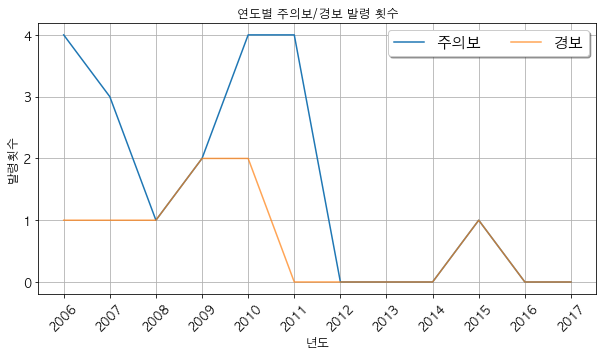

In [15]:
# 년도에 따른 주의보와 경보 발령횟수의 변화 흐름을 한 plt에 그리기 
plt.figure(figsize = (10,5))

plt.plot(df['년도'],df['주의보 발령횟수'], label = '주의보') # 선이 겹쳐서 보이지 않는 부분들이 있다. 
plt.plot(df['년도'],df['경보 발령횟수'], label = '경보', alpha = 0.7) # 투명도를 지정해서 두선이 겹치치 않게 지정한다. 0(투명) - 1(불투명)

plt.title('연도별 주의보/경보 발령 횟수')
plt.xlabel('년도')
plt.ylabel('발령횟수')

#tickss 설정 
plt.xticks(df['년도'], rotation = 45) # 1년단위로 , 45도 비스듬히 써라 
plt.yticks(range(0,5)) #  [0, 1, 2, 3, 4]

plt.grid()
plt.legend(fontsize = 15, fancybox = True, shadow = True, ncol = 2) # ncol : 2열로 출력하기 
plt.show()

- 횟수는 정수로 구성되어 있기 때문에 0.5 단위는 필요가 없다. df['주의보 발령횟수].unique()
- 년도는 2006 - 2017년까지 1년 단위로 들어간다. 

# =========7교시 =============


## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

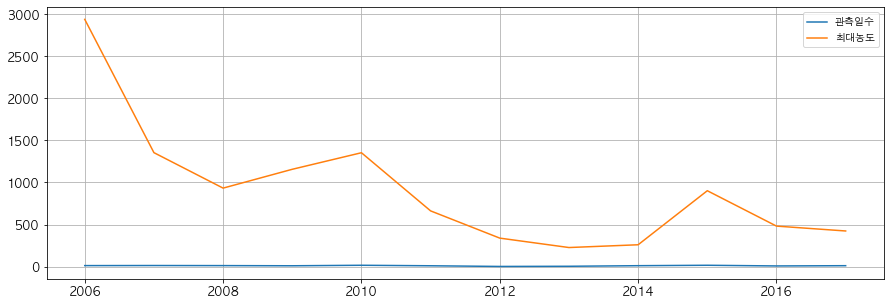

In [7]:
# y의 범위가 다를 경우 어떻게 하나? twinx(), twiny()

plt.figure(figsize = (15, 5))
plt.plot(df['년도'], df['관측일수'], label = '관측일수')
plt.plot(df['년도'], df['최대농도'], label = '최대농도')

plt.legend()
plt.grid()
plt.show()

- 관측일수와 최대 농도의 단위(scale)가 맞지 않아 관측일수가 변화 없는것 처럼 보인다.
- 범위를 나눠서 표현해보자 ==> subplots, twinx(), twiny()

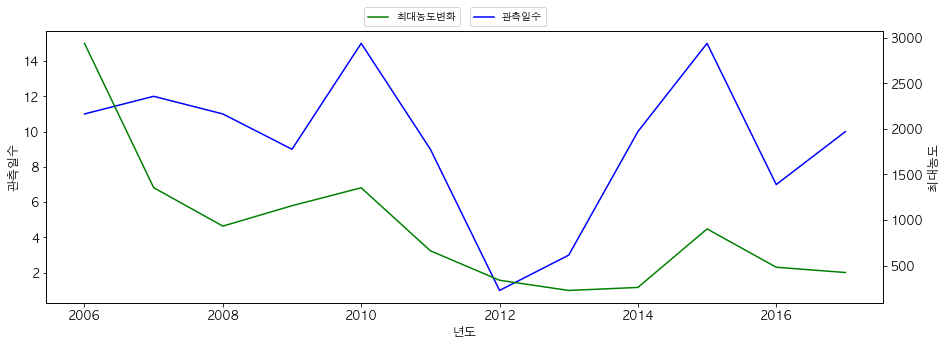

In [19]:
fig, ax1 = plt.subplots(figsize = (15,5)) # 행, 열의 개수를 생략 -> axes(subplot) 1개
ax2 = ax1.twinx() # x는 공통 

# 구분선 색 구별 
ax1.plot(df['년도'], df['관측일수'], label = '관측일수', color = 'b')
ax2.plot(df['년도'], df['최대농도'], label = '최대농도변화', color = 'g')

# 방법1. loc으로 위치시켜보기
# ax1.legend(loc = 'upper left')
# ax2.legend(loc = 'upper right')
# plt.legend()

# 방법2. bbox로 위치시켜보기 
ax1.legend(bbox_to_anchor = (0.5, 1), loc = 'lower left')
ax2.legend(bbox_to_anchor = (0.5, 1), loc = 'lower right')

# 축이름 지정
ax1.set_xlabel('년도')
ax1.set_ylabel('관측일수')
ax2.set_ylabel('최대농도')

plt.show()

- ax1, ax2 색이 동일하게 나온다. 구별이 안된다. color를 구분해주자. 
- 최대농도에 대한 레전드만 나온다. 왜? 겹치게 되는것. 따라서 레전드 위치를 따로 지정해줘야 한다. 
- 축 이름도 따로 지정한다


### 1.3.1 legend box 위치 지정
- loc : '수직방향위치 수평방향위치' 
    - axes box내에 legend box를 위치시킬 때 사용 , 총 9가지 
    - 수직방향위치 : lower, upper
    - 수평방향위치 : left, right
    - 정가운데 : center
    - 기본 : best
    
- bbox_to_anchor, loc 
    - axes box 밖에 legend box를 위치시킬 때 사용. 
    - bbox_to_anchor : 0-1 사이 실수 , legend box를 axes box 기준 어디에 둘 것인지를 지정한다. (x축위치, y축위치)
    - loc : legend box를 axes box의 어느부분을 기준으로 놓을 것인지

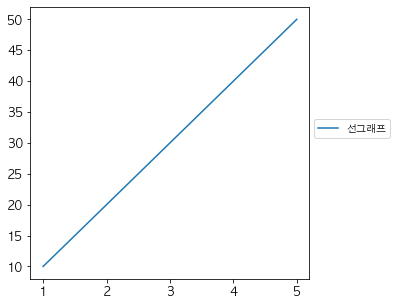

In [9]:
plt.figure(figsize = (5,5))
plt.plot([1, 2, 3, 4, 5],[10, 20, 30, 40, 50], label = '선그래프')

# plt.legend(loc = 'lower left')
# plt.legend(loc = 'center')

# plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')
# plt.legend(bbox_to_anchor = (1,1), loc = 'lower left') # 레전드 박스를 기준으로 그래프앵커가 왼쪽 밑에
# plt.legend(bbox_to_anchor = (1,1), loc = 'upper right')
# plt.legend(bbox_to_anchor = (1,1), loc = 'lower right')
plt.legend(bbox_to_anchor = (1,0.5), loc = 'lower left') 

plt.show()

# ====== 03.10 수 2교시 =======

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 **상관성**이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

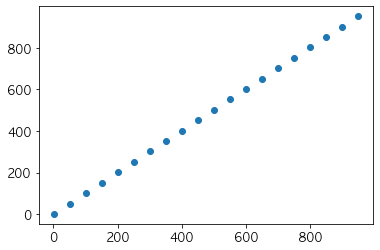

In [24]:
x = np.arange(1, 1000, 50)
y = np.arange(1, 1000, 50)
z = np.arange(1, 1000, 20)

plt.scatter(x, y) # 산점도
plt.show()

ValueError: x and y must be the same size

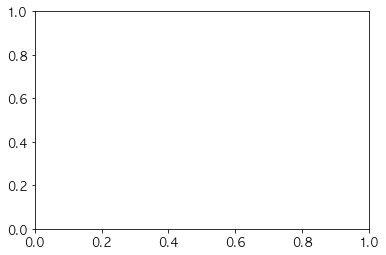

In [25]:
plt.scatter(x, z) # error : 사이즈가 다르기 때문에 x and y must be the same size, x,y축에 들어가는 값들의 개수가 동일해야 한다. 
plt.show()

In [ ]:
plt.scatter(x, a)
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/api/markers_api.html
- s
    - 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

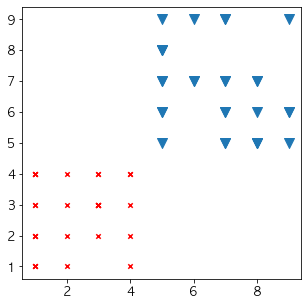

In [34]:
plt.figure(figsize = (5,5))
plt.scatter(x = np.random.randint(1,5,30),
            y = np.random.randint(1, 5, 30), 
            marker = 'x', s = 20, color = 'r') # 마커 디자인 변경 

plt.scatter(x = np.random.randint(5, 10, 30),
            y = np.random.randint(5, 10, 30),
            marker = 'v', s = 100)

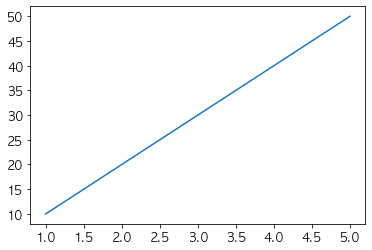

In [35]:
plt.plot([1, 2, 3, 4, 5],[10, 20, 30, 40, 50])
plt.show()

# ======  3교시 =======

## 2.3 산점도 활용

In [36]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')

### 경보 발령횟수와 관측일수 간의 관계

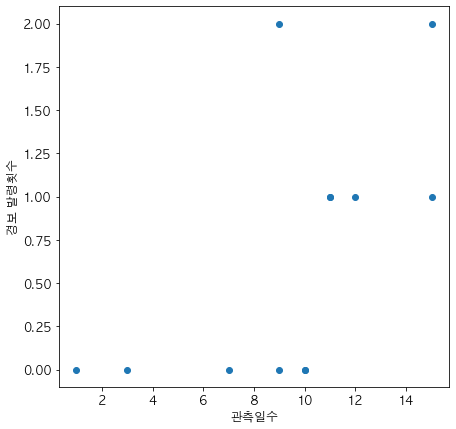

In [37]:
plt.figure(figsize = (7,7))
plt.scatter(df['관측일수'], df['경보 발령횟수'])
plt.xlabel('관측일수')
plt.ylabel('경보 발령횟수')
plt.show()
# 상관관계를 수치로 확인해보자 

- 상관계수 
    - 두 변수(컬럼)간의 상관관계를 계산한 값. 
    - 양의 상관관계 : 변수 하나의 값이 증가할 때 다른 하나도 같이 증가. 
        - 0 ~ 1 사이의 값이 나온다. (양수) 
    - 음의 상관관계 : 변수 하나의 값이 증가할 때 다른 하나는 감소
        - -1 ~ 0 (음수)
    - numpy.corrcoef(변수, 변수) - 변수는 array_like(배열, 리스트, 시리즈) 
    - pd.coor() 
- 상관관계의 숫자는 강도를 의미한다
    -   1 ~ 0.7 : 아주 강한 상관관계 
    - 0.7 ~ 0.3 : 강한 상관관계 
    - 0.3 ~ 0.1 : 약한 상관관계 
    - 0.1 ~ 0   : 관계가 없다

In [39]:
np.corrcoef(df['관측일수'], df['경보 발령횟수']) # 숫자는 강도를 의미한다. 

array([[1.        , 0.60416124],
       [0.60416124, 1.        ]])

# ===== 여기서부터 주식청약때문에 못들었엄 ㅜㅜ ======, 4교시

In [66]:
df[['관측일수','경보 발령횟수']].corr()

,관측일수,경보 발령횟수
관측일수,1.000000,0.604161
경보 발령횟수,0.604161,1.000000


In [41]:
# 상관관계를 heatmap으로 시각화
plt.imshow(corr, cmap = 'Blues')
plt.colorbar()
plt.show()

NameError: name 'corr' is not defined

In [ ]:
df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

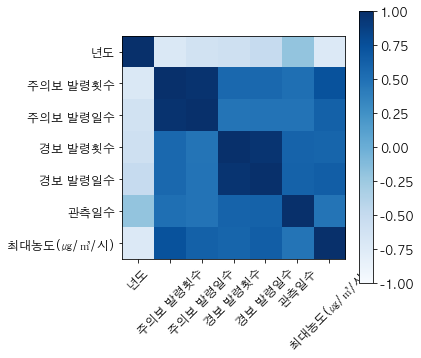

In [57]:
plt.figure(figsize = (5,5))
plt.imshow(df.corr(), cmap = 'Blues', vmin = -1, vmax = 1)

# ticks 설정. 
plt.yticks(ticks = range(df.columns.size), labels = df.columns)
plt.xticks(ticks = range(df.columns.size), labels = df.columns, rotation = 45)

plt.colorbar()
plt.show

- 컬럼을 지정 -> 숫자 대신에 뭐가 오면 좋을까? 컬럼이름이 들어오면 좋지. 
    - 틱지정. 틱은 숫자밖에 설정이 안됨? 틱에 라벨로 들어올수 있느 것은 숫자와 날짜형 밖에 안된다. 
    - 문자의 경우 어떻게? 
    - plt.xticks?

- 농도로 표시하면 좋지. cmap = 'Blues
- vmin = -1, vmax = 1 색에 대한 강도를 -1에서 1로 설정해준다. 

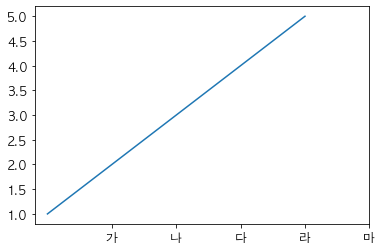

In [51]:
# ticks확인
plt.plot([1, 2, 3, 4, 5])
# plt.xticks([10, 20, 30, 40, 50]) # 틱에 지정한 값은? 
# 라벨을 1,2 3, 4 가 아닌 다른 것을 사용하고 싶다 => labels
plt.xticks(ticks = [1, 2, 3, 4, 5], labels = ['가', '나','다', '라', '마'])

plt.show()

# ======5교시 ======

In [58]:
dia = pd.read_csv('data/diamonds.csv')
dia.shape

(53940, 10)

In [59]:
dia.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

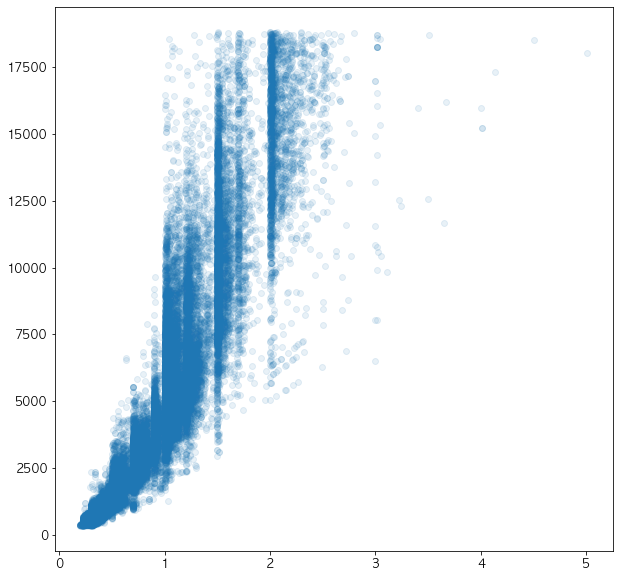

In [63]:
# carat과 price간의 관계를 산점도로 시각화
plt.figure(figsize = (10,10))
plt.scatter(dia['carat'],dia['price'], alpha = 0.1) # 투명도를 줘서 빈도수(?) 확인할 수 있다. 
plt.show()

In [65]:
# 상관계수를 확인해보자
dia[['carat','price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- axes.bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- axes.barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비    

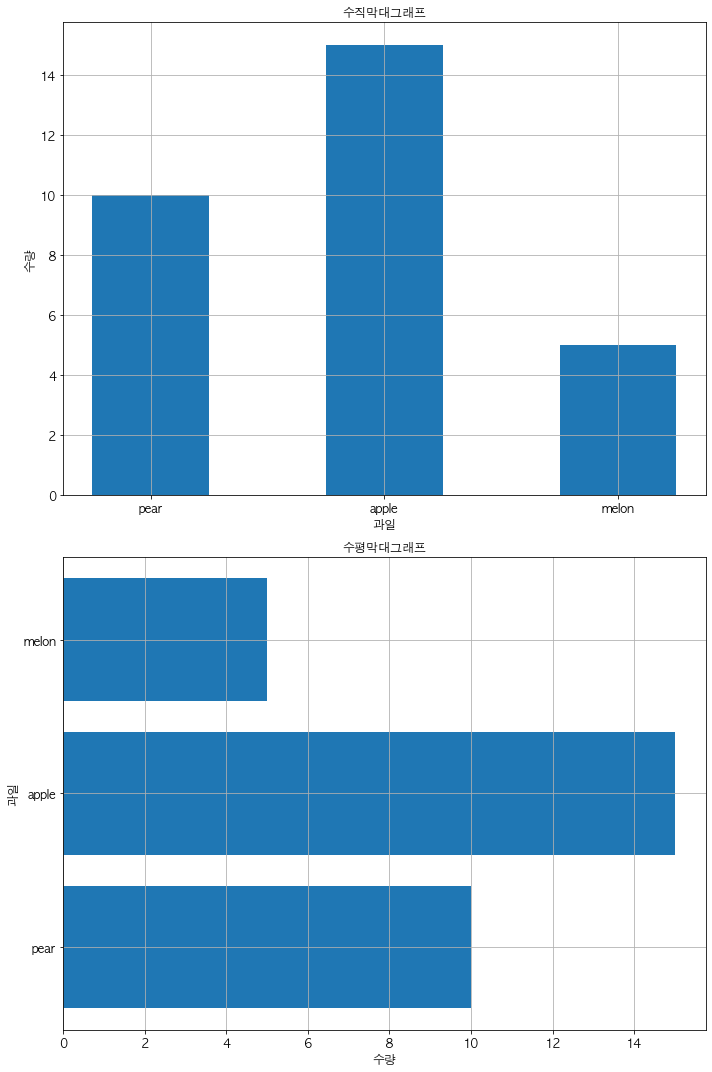

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fruits = ['pear', 'apple','melon']
amount = [10, 15, 5]

fig, axes = plt.subplots(2,1, figsize = (10,15))

axes[0].bar(fruits, amount, width = 0.5) # width : 0~1 사이 실수 
axes[0].set_title('수직막대그래프')
axes[0].set_xlabel('과일')
axes[0].set_ylabel('수량')
axes[0].grid(True)

axes[1].barh(fruits, amount)
axes[1].set_title('수평막대그래프')
axes[1].set_xlabel('수량')
axes[1].set_ylabel('과일')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# ========6교시========

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)

In [92]:
import pandas as pd

df = pd.read_excel('data/강수량.xlsx')
df.set_index('계절', inplace = True)
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


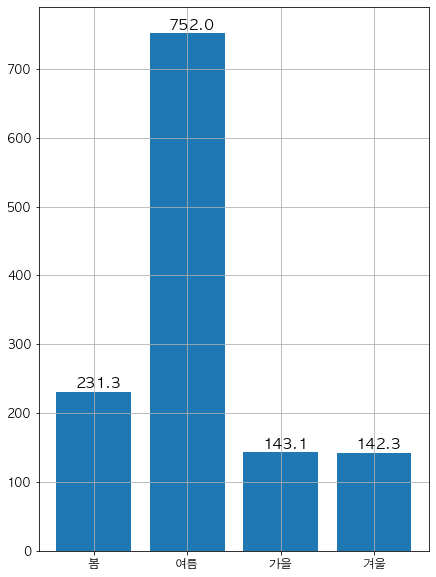

In [114]:
# 2009년 계절별 강수량 
plt.figure(figsize = (7, 10))
plt.bar(df.index, df[2009])# 인덱스를

for idx, rain in enumerate(df[2009]): # 막대그래프 위에 text를 입력해보자. 
    plt.text(idx-0.2,rain+5,rain, fontsize = 15) # (x, y, txt) x, y 좌표 예쁘게 맞추기 위해서 조절 (수동)

plt.grid(True)
plt.show()

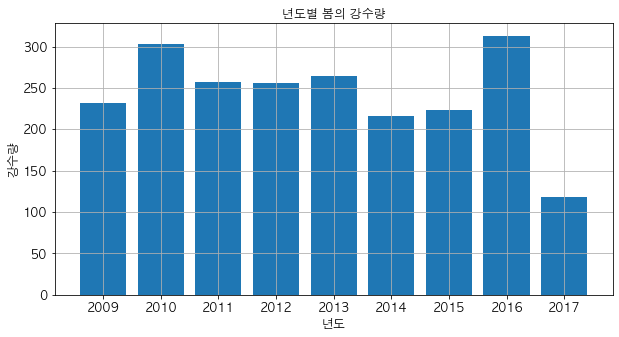

In [127]:
# 년도별 봄의 강수량 
plt.figure(figsize = (10, 5))
plt.bar(df.columns, df.loc['봄'])

plt.title('년도별 봄의 강수량')
plt.xlabel('년도')
plt.ylabel('강수량')
plt.xticks(df.columns.astype('int')) # 년도의 값이 숫자이기때문에 astype('int')형태로 

plt.grid(True)
plt.show()

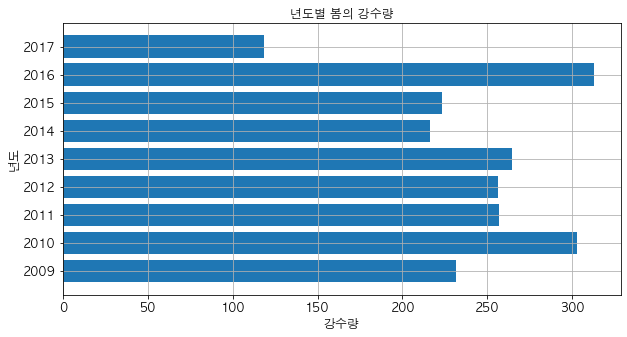

In [128]:
# 년도별 봄의 강수량 (수평)
plt.figure(figsize = (10, 5))
plt.barh(df.columns, df.loc['봄'])

plt.title('년도별 봄의 강수량')
plt.ylabel('년도')
plt.xlabel('강수량')
plt.yticks(df.columns.astype('int')) # 년도의 값이 숫자이기때문에 astype('int')형태로 

plt.grid(True)
plt.show()

In [ ]:
dia['cal']